In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
bank_data=pd.read_csv(r"C:\Users\Vyshnavi\OneDrive\Documents\Data Science\Naresh IT\Data Files\bank-additional.csv",sep=';')

In [12]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


**Step-2:Data Quick Checks**

$dtypes$

In [14]:
bank_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

$columns$

In [16]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

$shape$

In [17]:
bank_data.shape

(4119, 21)

In [18]:
bank_data.shape[0] #shape[0] represents the number of rows in the dataset

4119

In [19]:
bank_data.shape[1] #shape[1] represents the number of columns in the dataset

21

$size$

In [20]:
bank_data.size #size returns the number of observations in the data set

86499

$info$

In [21]:
bank_data.info

<bound method DataFrame.info of       age          job  marital          education default  housing     loan  \
0      30  blue-collar  married           basic.9y      no      yes       no   
1      39     services   single        high.school      no       no       no   
2      25     services  married        high.school      no      yes       no   
3      38     services  married           basic.9y      no  unknown  unknown   
4      47       admin.  married  university.degree      no      yes       no   
...   ...          ...      ...                ...     ...      ...      ...   
4114   30       admin.  married           basic.6y      no      yes      yes   
4115   39       admin.  married        high.school      no      yes       no   
4116   27      student   single        high.school      no       no       no   
4117   58       admin.  married        high.school      no       no       no   
4118   34   management   single        high.school      no      yes       no   

       

**Step-3**

**Convert categorical columns, numerical columns names seperately**

In [23]:
cat_cols=bank_data.select_dtypes(include="object").columns 
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [24]:
num_cols=bank_data.select_dtypes(exclude="object").columns
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

**Step-4:Fill the missing values**

In [25]:
bank_data.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4115,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4116,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4117,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**Note**

- In the bank additional dataset there is no missing values

- So we will not fill the missing values


**Step-5:Categorical data analysis**

$Unique$

In [28]:
bank_data["job"].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

$nunique$

In [29]:
bank_data["job"].nunique()

12

$valuecounts$

In [30]:
bank_data["job"].value_counts()

job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64

**Barchart**

In [31]:
unique=bank_data["job"].unique()
number=[]
for i in unique:
     con=bank_data["job"]==i
     val=len(bank_data[con])
     number.append(val)
     print(f"{i}:{val}")
number

blue-collar:884
services:393
admin.:1012
entrepreneur:148
self-employed:159
technician:691
management:324
student:82
retired:166
housemaid:110
unemployed:111
unknown:39


[884, 393, 1012, 148, 159, 691, 324, 82, 166, 110, 111, 39]

In [32]:
job_df=pd.DataFrame(zip(unique,number),columns=["job","count"])
job_df

,job,count
0,blue-collar,884
1,services,393
2,admin.,1012
3,entrepreneur,148
4,self-employed,159
5,technician,691
6,management,324
7,student,82
8,retired,166
9,housemaid,110


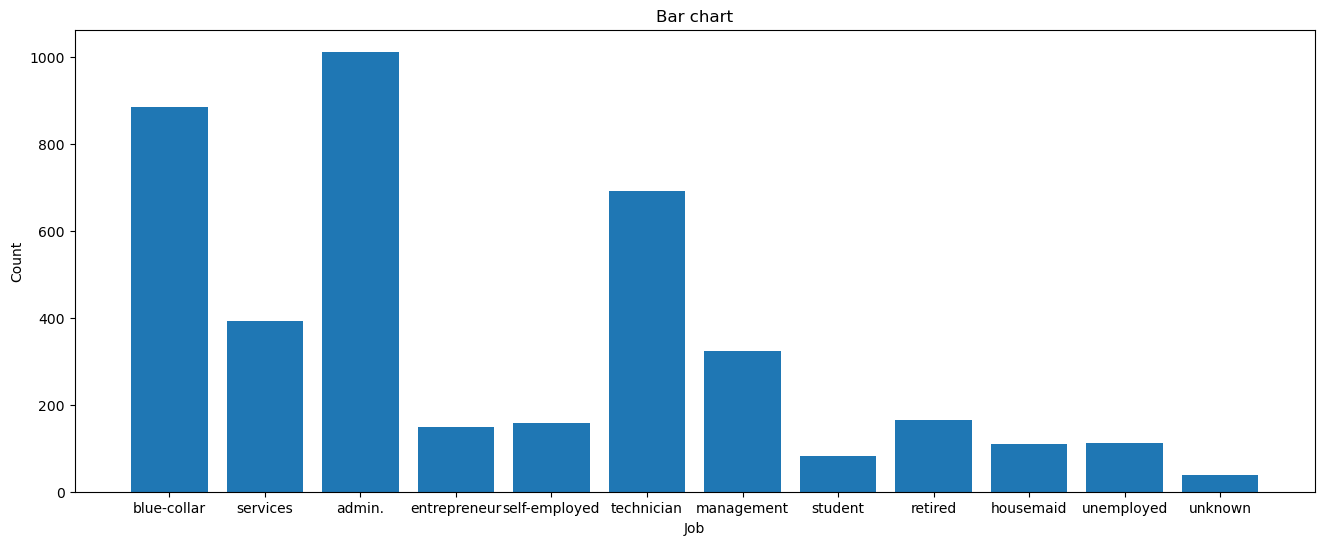

In [33]:
plt.figure(figsize=(16,6))
plt.bar("job","count",data=job_df)
plt.title("Bar chart")
plt.xlabel("Job")
plt.ylabel("Count")
plt.savefig("bank_barchart.png")
plt.show()

$countplot$

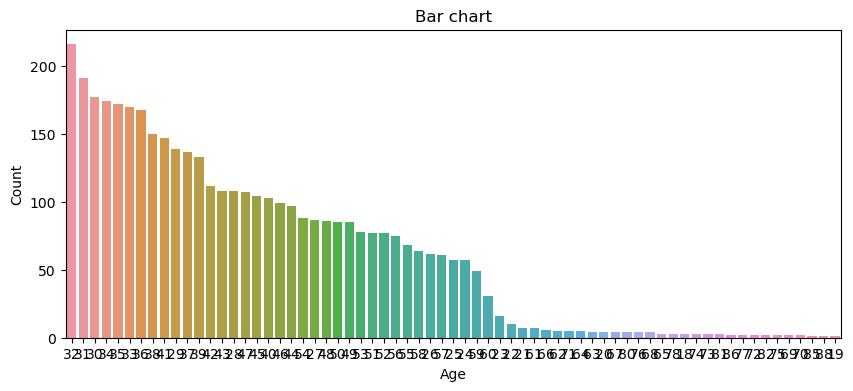

In [35]:
plt.figure(figsize=(10,4))
cdf=bank_data["age"].value_counts()
keys=cdf.keys()
sns.countplot(data=bank_data,x="age",order=keys)
plt.title("Bar chart")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

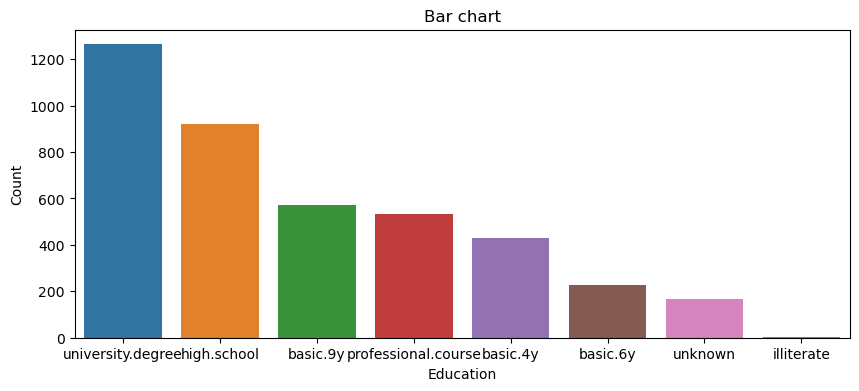

In [36]:
plt.figure(figsize=(10,4))
edf=bank_data["education"].value_counts()
keys=edf.keys()
sns.countplot(data=bank_data,x="education",order=keys)
plt.title("Bar chart")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

**Pie − chart**

In [37]:
education_df=pd.DataFrame(zip(unique,number),columns=["education","count"])
education_df

,education,count
0,blue-collar,884
1,services,393
2,admin.,1012
3,entrepreneur,148
4,self-employed,159
5,technician,691
6,management,324
7,student,82
8,retired,166
9,housemaid,110


In [38]:
unique=bank_data["education"].unique()
number=[]
for i in unique:
     con=bank_data["education"]==i
     val=len(bank_data[con])
     number.append(val)
     print(f"{i}:{val}")
number

basic.9y:574
high.school:921
university.degree:1264
professional.course:535
basic.6y:228
basic.4y:429
unknown:167
illiterate:1


[574, 921, 1264, 535, 228, 429, 167, 1]

In [39]:
bank_data["education"].value_counts()


education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64

In [40]:
edf_bank=bank_data["education"].value_counts()
edf_bank.keys()
values1=edf_bank.values
keys,values1

(Index(['university.degree', 'high.school', 'basic.9y', 'professional.course',
        'basic.4y', 'basic.6y', 'unknown', 'illiterate'],
       dtype='object', name='education'),
 array([1264,  921,  574,  535,  429,  228,  167,    1], dtype=int64))

([<matplotlib.patches.Wedge at 0x1ef97f31d50>,
 [Text(0.6272060694548087, 0.9036661697989197, ''),
  Text(-0.9594739282387753, 0.5379681970433322, ''),
  Text(-0.889326518355142, -0.6473780531886463, ''),
  Text(-0.10513099855404238, -1.0949645990364392, ''),
  Text(0.6565005952591312, -0.8826137141606213, ''),
  Text(0.9997857314658887, -0.45872485343309904, ''),
  Text(1.0908746354440346, -0.14139494243021788, ''),
  Text(1.0999996801320415, -0.0008388738920141718, '')])

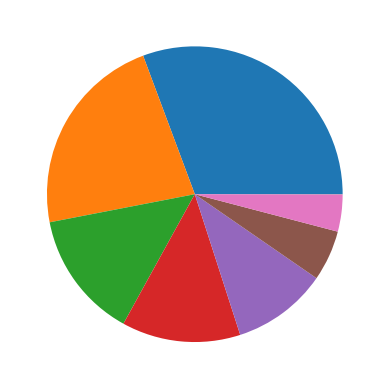

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.pie(values1)

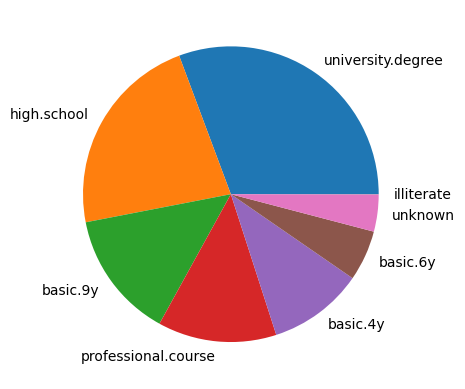

In [42]:
plt.pie(values1,labels=keys)
plt.show()

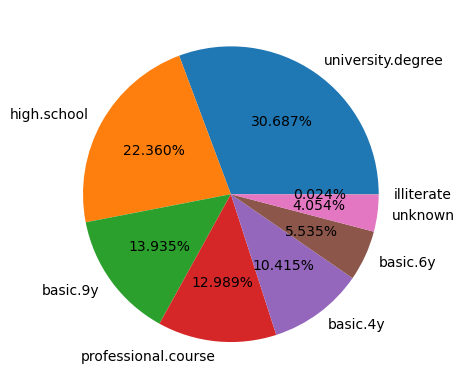

In [44]:
plt.pie(values1,labels=keys,autopct="%0.3f%%")
plt.show()

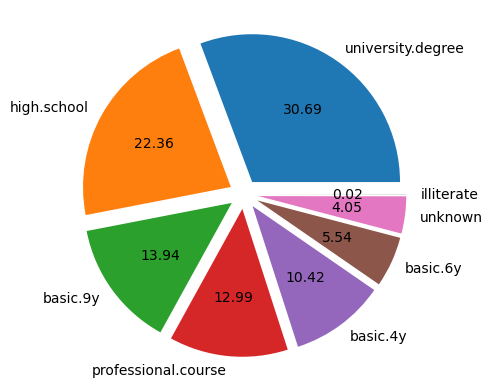

In [54]:
#explode=it will divide the parts
plt.pie(values1,explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],labels=keys,autopct="%0.2f")
plt.show()